# Hello, Graph World
## Krackhardt Kite Graph in R using igraph

This notebook builds and visualizes the Krackhardt kite graph, a classic social network structure introduced by David Krackhardt. The graph has 10 nodes representing people and 18 edges representing connections between them. It's a go,to example in network analysis because its structure highlights key concepts like centrality, bridging, and clustering all in one compact graph.

In [3]:
# Install and load igraph
if (!require(igraph)) install.packages("igraph", repos = "https://cran.r-project.org")
library(igraph)

## Define Nodes and Edges

The 10 nodes are: Andre, Beverly, Carol, Diane, Ed, Fernando, Garth, Heather, Ike, and Jane. The edges follow the standard Krackhardt kite structure, where the upper portion is densely connected and it tapers down to a chain through Heather, Ike, and Jane.

In [4]:
# Define the edge list for the Krackhardt kite
edges <- c(
  "Andre",    "Beverly",
  "Andre",    "Carol",
  "Andre",    "Diane",
  "Andre",    "Fernando",
  "Beverly",  "Diane",
  "Beverly",  "Ed",
  "Beverly",  "Garth",
  "Carol",    "Diane",
  "Carol",    "Fernando",
  "Diane",    "Ed",
  "Diane",    "Fernando",
  "Diane",    "Garth",
  "Diane",    "Heather",
  "Ed",       "Garth",
  "Fernando", "Garth",
  "Fernando", "Heather",
  "Garth",    "Heather",
  "Heather",  "Ike",
  "Ike",      "Jane"
)

# Create the undirected graph
kite <- graph(edges, directed = FALSE)

# Quick summary
summary(kite)

IGRAPH 3a87028 UN-- 10 19 -- 
+ attr: name (v/c)


## Visualize the Graph

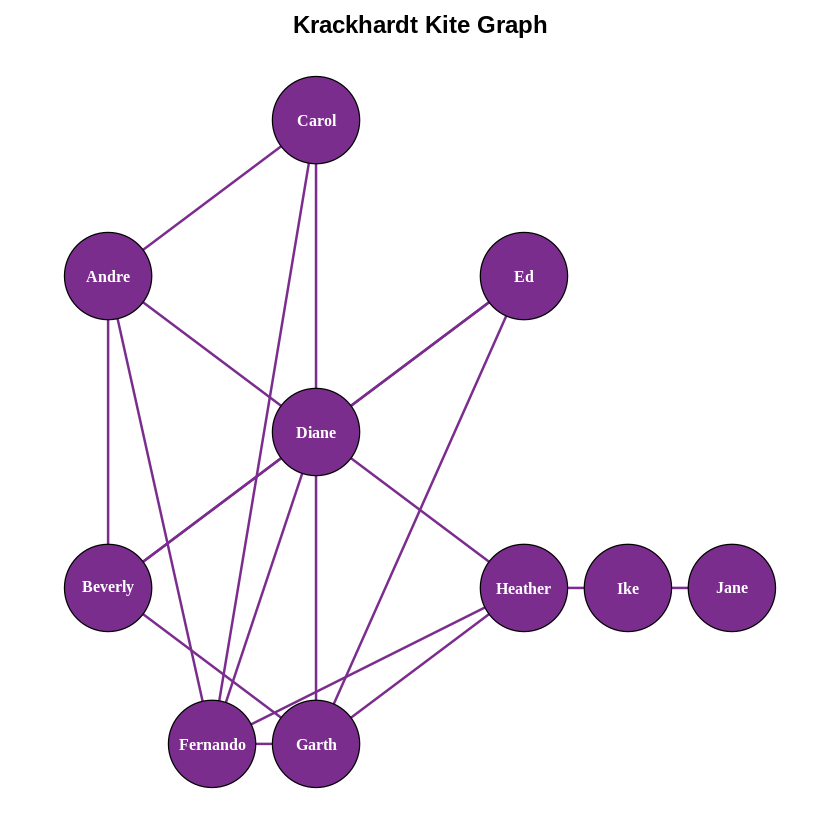

In [5]:
# Set up a layout that mirrors the classic kite shape
layout_kite <- matrix(c(
  0, 2,    # Andre
  0, 0,    # Beverly
  2, 3,    # Carol
  2, 1,    # Diane
  1, -1,   # Ed
  4, 2,    # Fernando
  2, -1,   # Garth
  4, 0,    # Heather
  5, 0,    # Ike
  6, 0     # Jane
), ncol = 2, byrow = TRUE)

# Plot
par(mar = c(1, 1, 2, 1))
plot(
  kite,
  layout          = layout_kite,
  vertex.size     = 28,
  vertex.color    = "#7B2D8E",
  vertex.label.color = "white",
  vertex.label.cex   = 0.8,
  vertex.label.font  = 2,
  edge.color      = "#7B2D8E",
  edge.width      = 2,
  main            = "Krackhardt Kite Graph"
)

## Basic Network Stats

Just to sanity,check the graph and pull out a few useful metrics.

In [6]:
cat("Number of nodes:", vcount(kite), "\n")
cat("Number of edges:", ecount(kite), "\n")
cat("Graph density:",   round(graph.density(kite), 3), "\n\n")

# Degree of each node
deg <- degree(kite)
cat("Degree per node:\n")
print(deg)

Number of nodes: 10 
Number of edges: 19 


Warning message:
“`graph.density()` was deprecated in igraph 2.0.0.
ℹ Please use `edge_density()` instead.”


Graph density: 0.422 

Degree per node:
   Andre  Beverly    Carol    Diane Fernando       Ed    Garth  Heather 
       4        4        3        7        5        3        5        4 
     Ike     Jane 
       2        1 


In [7]:
# Betweenness centrality (who bridges subgroups)
cat("Betweenness centrality:\n")
print(round(betweenness(kite), 2))

Betweenness centrality:
   Andre  Beverly    Carol    Diane Fernando       Ed    Garth  Heather 
    0.83     0.83     0.00     9.67     3.83     0.00     3.83    14.00 
     Ike     Jane 
    8.00     0.00 


Heather's high betweenness makes sense, she's the bridge between the dense cluster on the left and the chain leading to Jane on the right. This is exactly why the Krackhardt kite is such a useful teaching example: it packs degree centrality, betweenness, and closeness dynamics into 10 nodes.